## STOCKX DATA ANALYSIS

In [2]:
import pandas as pd 


In [3]:
stockx = pd.read_csv('/Users/manmohitsingh/Desktop/Analyst Builder/My Projects/StockX/StockX-Data-Contest-2019-3.csv')

In [4]:
stockx.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
5,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan
6,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11.0,California
7,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10.0,New York
8,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Kansas
9,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Florida


In [5]:
stockx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


## Data cleaning 

In [6]:
## convert the date columns to datetime
stockx['Order Date'] = pd.to_datetime(stockx['Order Date'], format='%m/%d/%y')
stockx['Release Date'] = pd.to_datetime(stockx['Release Date'], format='%m/%d/%y')




In [7]:
## remove the $ signs from prices and convert to float
stockx['Retail Price'] = stockx['Retail Price'].replace({'\$':''}, regex=True).astype(float)
stockx['Sale Price'] = stockx['Sale Price'].replace({'\,':''}, regex=True)
stockx['Sale Price'] = stockx['Sale Price'].replace({'\$':''}, regex=True).astype(float)

## find the row with a , in the sale price column
stockx.loc[stockx['Sale Price'].astype(str).str.contains(',')]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


In [8]:
## standardize the cloumn names
stockx.columns = stockx.columns.str.replace(' ', '_')

In [9]:
## create a new column for the profit
stockx['Profit'] = stockx['Sale_Price'] - stockx['Retail_Price']

In [14]:
## create column for profit margin
stockx['Profit_Margin'] = round((stockx['Profit']/stockx['Retail_Price']) * 100, 1)

In [ ]:
## drop Profit_margin column
stockx.drop(columns=['Profit_margin'], inplace=True)

In [15]:
stockx.head(10)

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Profit,Profit_Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0,398.6
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,465.0,211.4
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,470.0,213.6
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0,388.6
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0,276.4
5,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220.0,2017-02-11,8.5,Michigan,578.0,262.7
6,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220.0,2016-12-17,11.0,California,564.0,256.4
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220.0,2017-04-29,10.0,New York,240.0,109.1
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,2017-04-29,11.0,Kansas,245.0,111.4
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,2017-04-29,11.0,Florida,245.0,111.4


## Exploratory Data Analysis

In [12]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## most popluar sneaker 
most_popular_sneaker =  stockx['Sneaker_Name'].value_counts().idxmax()
most_popular_sneaker_count = stockx['Sneaker_Name'].value_counts().max()

print('Most popular shoe is:',most_popular_sneaker, 'with the count of', most_popular_sneaker_count )

Most popular shoe is: adidas-Yeezy-Boost-350-V2-Butter with the count of 11423


Text(0.5, 1.0, 'Top 5 Most Popular Sneakers')

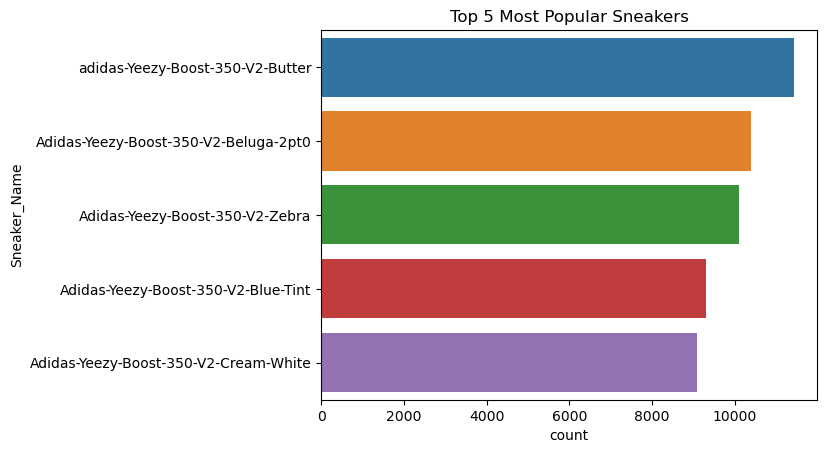

In [125]:
top_5_sneakers = stockx['Sneaker_Name'].value_counts().head(5).reset_index()


sns.barplot(x = 'count', y = 'Sneaker_Name', data = top_5_sneakers)
plt.title('Top 5 Most Popular Sneakers')


Text(0.5, 1.0, 'Top 5 Sneakers by AVG Profit Margin')

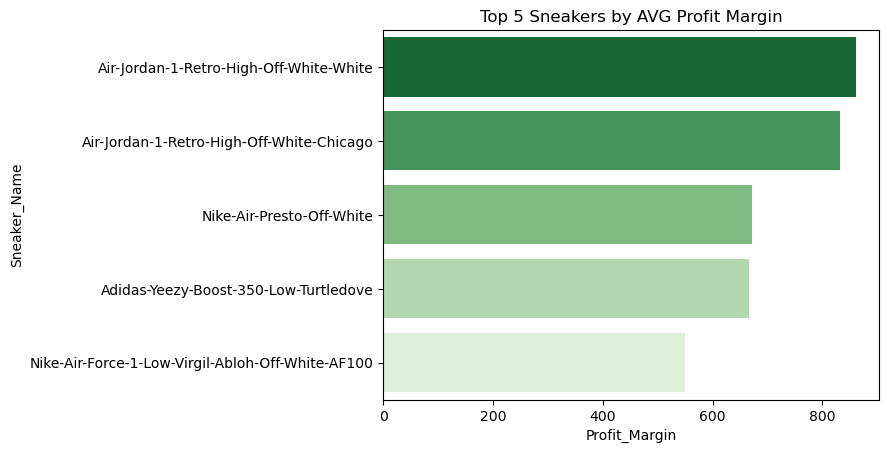

In [185]:
profit_by_sneaker = stockx.groupby('Sneaker_Name')['Profit_Margin'].mean().sort_values(ascending=False).reset_index()
top_5_margin_sneakers = profit_by_sneaker.head(5).reset_index()

sns.barplot(x = 'Profit_Margin', y = 'Sneaker_Name', data = top_5_margin_sneakers ,palette='Greens_r')
plt.title('Top 5 Sneakers by AVG Profit Margin')



addidas sold more but Nike have the better profit margin

Text(0.5, 1.0, 'bottom 5 Sneakers by Profit Margin')

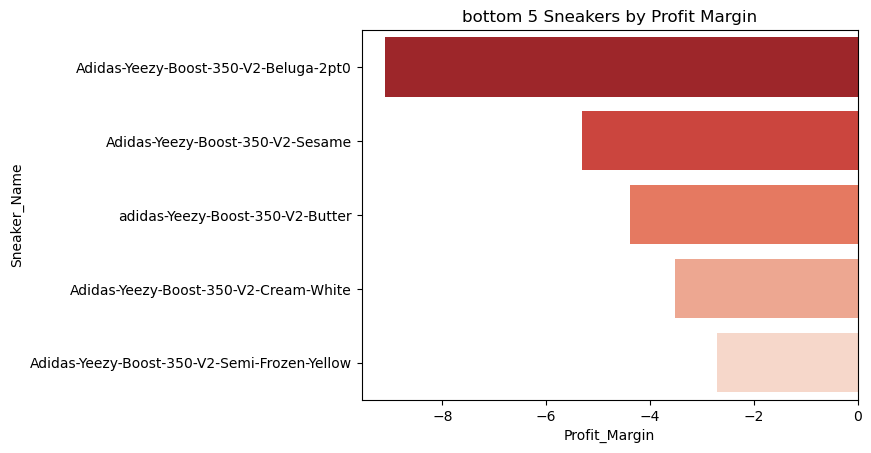

In [144]:
negative = stockx[stockx['Profit_Margin'] < 0].groupby('Sneaker_Name')['Profit_Margin'].mean().sort_values(ascending=True).head(10).reset_index()


sns.barplot(x = 'Profit_Margin', y = 'Sneaker_Name', data = negative,palette='Reds_r')
plt.title('bottom 5 Sneakers by Profit Margin')

### Sneakers that lost money and had more than 10 sales 

<Axes: xlabel='avg_profit_margin', ylabel='Sneaker_Name'>

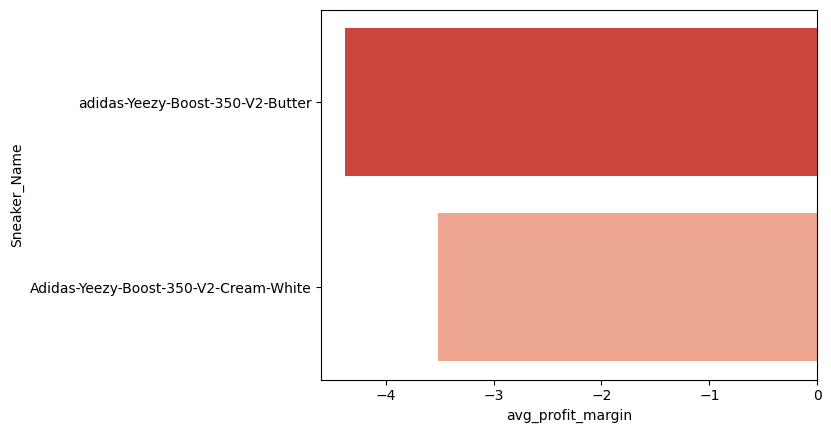

In [171]:
bottom_5_margin_sneakers = stockx[stockx['Profit_Margin']< 0].groupby('Sneaker_Name').agg(avg_profit_margin = ('Profit_Margin', 'mean'),
                                sale_count = ('Sneaker_Name', 'count')).reset_index()

count_bottom = bottom_5_margin_sneakers[bottom_5_margin_sneakers['sale_count'] > 10]

top_5_lowest_margin = count_bottom.sort_values(by='avg_profit_margin',ascending=True).head(5).reset_index()
sns.barplot(
    x='avg_profit_margin',
    y='Sneaker_Name',
    data=top_5_lowest_margin,
    palette='Reds_r'
    
)

* number one thing that decides the profit margin is how rare the shoe is 

In [149]:
## check correlation between when the shoe was reaseased ant profit
stockx['Days_since_realse'] = (stockx['Order_Date'] - stockx['Release_Date']).dt.days

Text(0.5, 1.0, 'Days since release vs Profit Margin')

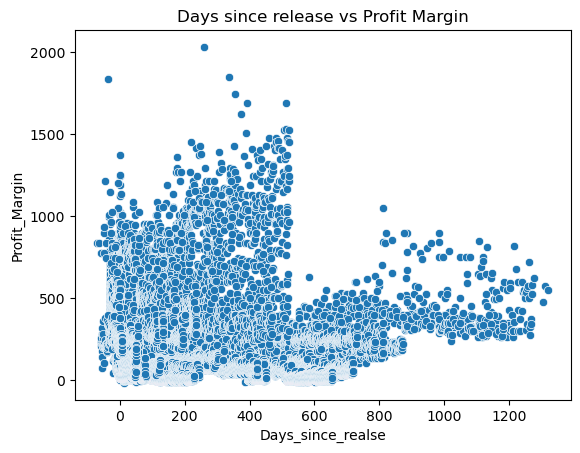

In [154]:
sns.scatterplot(x = 'Days_since_realse', y = 'Profit_Margin', data = stockx)
plt.title('Days since release vs Profit Margin')

In [20]:
## check different buyer regions and profit 
profit_by_regions = stockx.groupby('Buyer_Region')['Profit'].sum().sort_values(ascending=False).reset_index()
profit_by_regions.head(10)



,Buyer_Region,Profit
0,California,5251834.0
1,New York,3860727.0
2,Oregon,2023251.0
3,Florida,1516674.0
4,Texas,1216426.0
5,New Jersey,1134251.0
6,Illinois,831076.0
7,Pennsylvania,654021.0
8,Massachusetts,637640.0
9,Michigan,569063.0


In [195]:
Margin_by_regions = stockx.groupby('Buyer_Region')['Profit_Margin'].mean().sort_values(ascending=False).reset_index()
Margin_by_regions.head(10)

,Buyer_Region,Profit_Margin
0,Delaware,156.393398
1,Hawaii,150.404439
2,Nevada,147.300380
3,California,143.817644
4,Oregon,139.961841
5,Vermont,133.794048
6,Iowa,133.102609
7,Utah,127.984222
8,Virginia,127.244509
9,Arizona,126.630615


<Axes: xlabel='Shoe_Size', ylabel='Profit_Margin'>

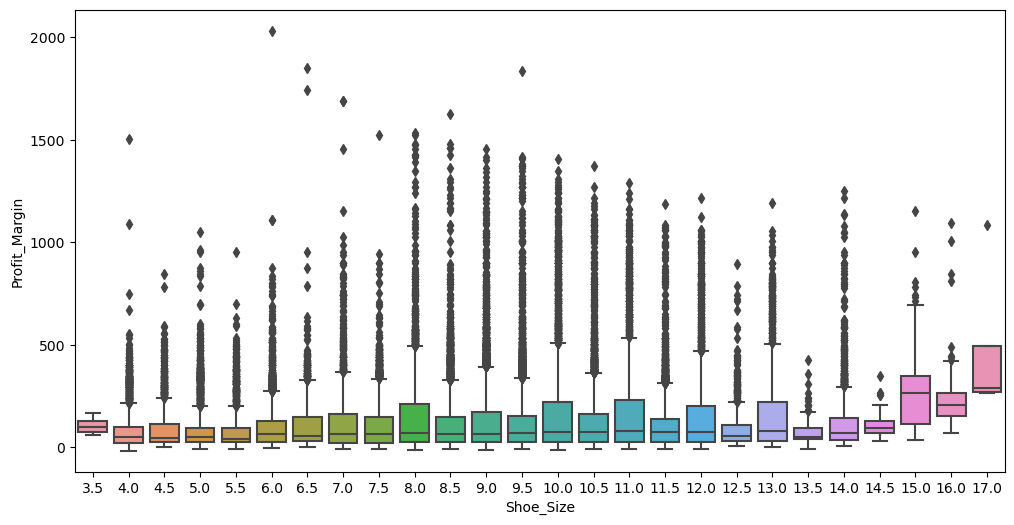

In [16]:
## check which shoesize makes the most profit
plt.figure(figsize=(12, 6))
sns.boxplot(x= 'Shoe_Size', y = 'Profit_Margin', data = stockx)

<Axes: xlabel='Order_Date', ylabel='Count'>

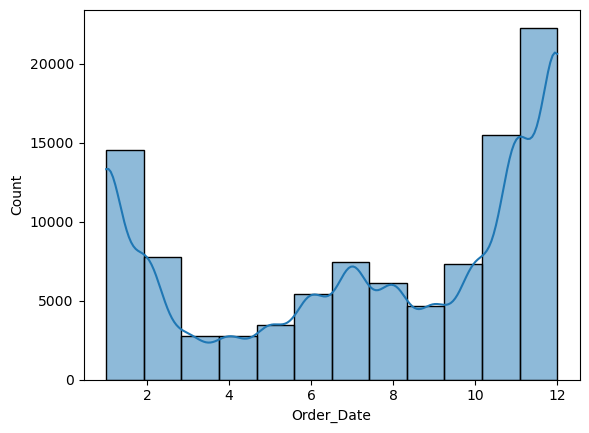

In [24]:
## total sales by month
Order_Month = stockx['Order_Date'].dt.month

sns.histplot(Order_Month, bins=12, kde=True)

## Overall Findings

1. Most popular Sneakers on stockx are Yeezys

2. Yeezys have higher sale count but profit margin is higher on Nike shoes 

3. Most important factor when it comes to profit margin on a sneaker is how rare the model is

4. Your Profit Margin goes down if you are selling a shoe that was released more than 500 days (1.5 year)

5. Your overall profit and profit margin will depend on which state you are selling in. Such as California, New York , Texas Florida

6. Your overall profit will be higher in states with bigger population and major cities but you’ll have a better profit margin in states where the supply is low, Delaware has the highest profit margin followed by Hawaii and Nevada 

7. California is the best state when it comes to reselling sneakers it’s #1 in total profit and top 5 in profit Margin 

8. Shoe size does play a role in profit. But anything from size 8 to 13 have pretty even profits. Anything from size 14 will have much higher profit margin

9. Best time to sell is holiday season. people spend most amount of money from October to january 


## Recommendations for sellers

1. Focus on rare, hyped models (e.g., limited editions).

2. Sell quickly post-release to capitalize on hype-driven margins.

3. Target high-demand regions (California, New York) for premium pricing.

4. Leverage rare sizes (e.g., 14, 5.5) for higher markups.

5. Avoid oversaturated models unless holding for long-term appreciation.
